In [0]:
/FileStore/tables/genres_v2.csv

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
File <command-448961817078490>:1
----> 1 FileStore/tables/genres_v2.csv()

NameError: name 'FileStore' is not defined

In [0]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans
from pyspark.sql.functions import col, floor
from pyspark.ml.linalg import Vectors

# Create a SparkSession
spark = SparkSession.builder.appName("CustomCluster").getOrCreate()

# Load your data into a DataFrame (replace this with your file path)
file_path = "/FileStore/tables/genres_v2.csv"
df = spark.read.csv(file_path, header=True, inferSchema=True)

# Selecting relevant features and taking 200 values from the dataset
data = df.limit(200).select('danceability')

# Categorize 'danceability' values into the specified clusters
data = data.withColumn("cluster", floor((col("danceability") - 1) / 20) + 1)

# Vector Assembler to create the features column
assembler = VectorAssembler(inputCols=['danceability'], outputCol="features")
data = assembler.transform(data).select("features", "cluster")

# Trains a k-means model
kmeans = KMeans().setK(5).setSeed(1)  # Assuming 5 clusters
model = kmeans.fit(data)

# Get the predicted cluster for each point
predictions = model.transform(data)

# Show the count of songs in each cluster
predictions.groupBy("prediction").count().show()


+----------+-----+
|prediction|count|
+----------+-----+
|         2|   62|
|         0|   76|
|         1|   21|
|         4|   36|
|         3|    5|
+----------+-----+



In [0]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans
from pyspark.sql.functions import col, floor

# Create a SparkSession
spark = SparkSession.builder.appName("DanceabilityClusters").getOrCreate()

# Load your data into a DataFrame (replace this with your file path)
file_path = "/FileStore/tables/genres_v2.csv"
df = spark.read.csv(file_path, header=True, inferSchema=True)

# Selecting 'danceability' feature and taking 200 values from the dataset
data = df.limit(200).select('danceability')

# Categorize 'danceability' values into the specified clusters
data = data.withColumn("cluster", floor(col("danceability") * 5) + 1)

# Vector Assembler to create the features column
assembler = VectorAssembler(inputCols=['danceability'], outputCol="features")
data = assembler.transform(data).select("features", "cluster")

# Trains a k-means model
kmeans = KMeans().setK(5).setSeed(1)  # Assuming 5 clusters
model = kmeans.fit(data)

# Get the predicted cluster for each point
predictions = model.transform(data)

# Show the count of songs in each predicted range
predicted_ranges = (
    predictions
    .groupBy("cluster")
    .count()
    .orderBy("cluster")
)

predicted_ranges.show(truncate=False)


+-------+-----+
|cluster|count|
+-------+-----+
|2      |4    |
|3      |30   |
|4      |99   |
|5      |67   |
+-------+-----+



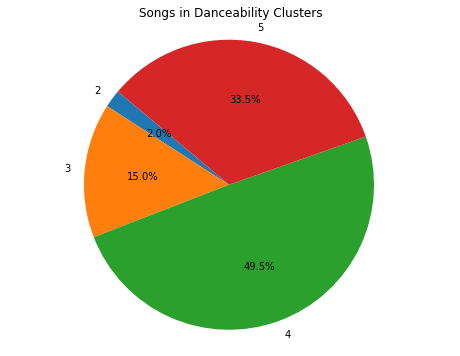

In [0]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans
import matplotlib.pyplot as plt

# Create a SparkSession
spark = SparkSession.builder.appName("DanceabilityClusters").getOrCreate()

# Load your data into a DataFrame (replace this with your file path)
file_path = "/FileStore/tables/genres_v2.csv"
df = spark.read.csv(file_path, header=True, inferSchema=True)

# Selecting 'danceability' feature and taking 200 values from the dataset
data = df.limit(200).select('danceability')

# Categorize 'danceability' values into the specified clusters
data = data.withColumn("cluster", floor(col("danceability") * 5) + 1)

# Vector Assembler to create the features column
assembler = VectorAssembler(inputCols=['danceability'], outputCol="features")
data = assembler.transform(data).select("features", "cluster")

# Trains a k-means model
kmeans = KMeans().setK(5).setSeed(1)  # Assuming 5 clusters
model = kmeans.fit(data)

# Get the predicted cluster for each point
predictions = model.transform(data)

# Count the songs in each predicted range
predicted_ranges = (
    predictions
    .groupBy("cluster")
    .count()
    .orderBy("cluster")
    .collect()
)

# Extracting counts and cluster numbers
counts = [row['count'] for row in predicted_ranges]
clusters = [row['cluster'] for row in predicted_ranges]

# Pie chart
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=clusters, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Songs in Danceability Clusters')
plt.show()


In [0]:
pip install plotly


Python interpreter will be restarted.
Python interpreter will be restarted.


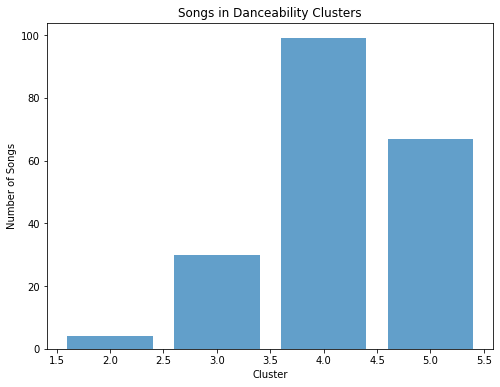

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import floor, col
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans
import matplotlib.pyplot as plt

# Create a SparkSession
spark = SparkSession.builder.appName("DanceabilityClusters").getOrCreate()

# Load your data into a DataFrame (replace this with your file path)
file_path = "/FileStore/tables/genres_v2.csv"
df = spark.read.csv(file_path, header=True, inferSchema=True)

# Selecting 'danceability' feature and taking 200 values from the dataset
data = df.limit(200).select('danceability')

# Categorize 'danceability' values into the specified clusters
data = data.withColumn("cluster", floor(col("danceability") * 5) + 1)

# Vector Assembler to create the features column
assembler = VectorAssembler(inputCols=['danceability'], outputCol="features")
data = assembler.transform(data).select("features", "cluster")

# Trains a k-means model
kmeans = KMeans().setK(5).setSeed(1)  # Assuming 5 clusters
model = kmeans.fit(data)

# Get the predicted cluster for each point
predictions = model.transform(data)

# Count the songs in each predicted range
predicted_ranges = (
    predictions
    .groupBy("cluster")
    .count()
    .orderBy("cluster")
    .collect()
)

# Extracting counts and cluster numbers
counts = [row['count'] for row in predicted_ranges]
clusters = [row['cluster'] for row in predicted_ranges]

# Bar graph
plt.figure(figsize=(8, 6))
plt.bar(clusters, counts, align='center', alpha=0.7)
plt.xlabel('Cluster')
plt.ylabel('Number of Songs')
plt.title('Songs in Danceability Clusters')
plt.show()


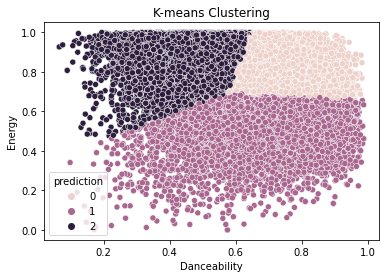

In [0]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans
import matplotlib.pyplot as plt
import seaborn as sns  # Add this import statement

# Create a SparkSession
spark = SparkSession.builder.appName("KMeansClustering").getOrCreate()

# Load data from a CSV file into a DataFrame
file_path = "/FileStore/tables/genres_v2.csv"  # Replace this with your file path
df = spark.read.csv(file_path, header=True, inferSchema=True)

# Selecting relevant features
selected_features = ['danceability', 'energy']

# Vector Assembler to combine selected features into a single vector column
assembler = VectorAssembler(inputCols=selected_features, outputCol="features")
data = assembler.transform(df)

# Trains a k-means model
kmeans = KMeans().setK(3).setSeed(1)  # Assuming 3 clusters
model = kmeans.fit(data)

# Make predictions
predictions = model.transform(data)

# Convert Spark DataFrame to Pandas DataFrame for plotting
pandas_df = predictions.select('danceability', 'energy', 'prediction').toPandas()

# Scatter plot
sns.scatterplot(data=pandas_df, x='danceability', y='energy', hue='prediction')
plt.title('K-means Clustering')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.show()


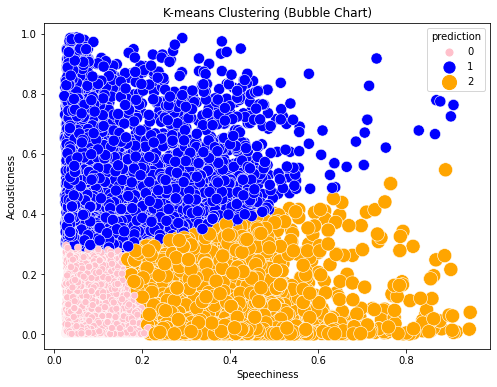

In [0]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Create a SparkSession
spark = SparkSession.builder.appName("KMeansClustering").getOrCreate()

# Load data from a CSV file into a DataFrame
file_path = "/FileStore/tables/genres_v2.csv"  # Replace this with your file path
df = spark.read.csv(file_path, header=True, inferSchema=True)

# Selecting relevant features: speechiness and acousticness
selected_features = ['speechiness', 'acousticness']

# Vector Assembler to combine selected features into a single vector column
assembler = VectorAssembler(inputCols=selected_features, outputCol="features")
data = assembler.transform(df)

# Trains a k-means model
kmeans = KMeans().setK(3).setSeed(1)  # Assuming 3 clusters
model = kmeans.fit(data)

# Make predictions
predictions = model.transform(data)

# Convert Spark DataFrame to Pandas DataFrame for plotting
pandas_df = predictions.select('speechiness', 'acousticness', 'prediction').toPandas()

# Bubble chart with custom colors
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pandas_df, x='speechiness', y='acousticness', hue='prediction', size='prediction', sizes=(50, 200),
                palette=['pink', 'blue', 'orange'])
plt.title('K-means Clustering (Bubble Chart)')
plt.xlabel('Speechiness')
plt.ylabel('Acousticness')
plt.show()
